In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None
from sklearn.metrics import r2_score
import statsmodels.api as sm
sns.set_theme(style="whitegrid")

In [152]:
df = pd.read_csv('day.csv',index_col='instant')

# EDA

In [153]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.181250,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.686950,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.112700,53.5833,17.875868,68,891,959
9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.808750,43.4167,24.250650,54,768,822


In [154]:
df['dteday'] = pd.to_datetime(df.dteday, dayfirst=True)

In [155]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
sns.set_style('ticks', {'axes.grid':True})

### Variation of temperature with year

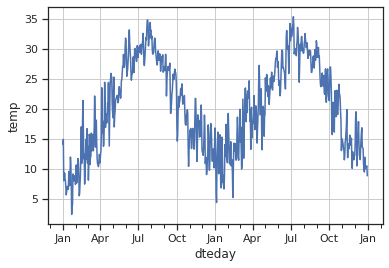

In [156]:
ax = sns.lineplot(x=df.dteday, y=df.temp)
ax.xaxis.set_major_formatter(DateFormatter('%b'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

Text(0, 0.5, 'Bike_rentals')

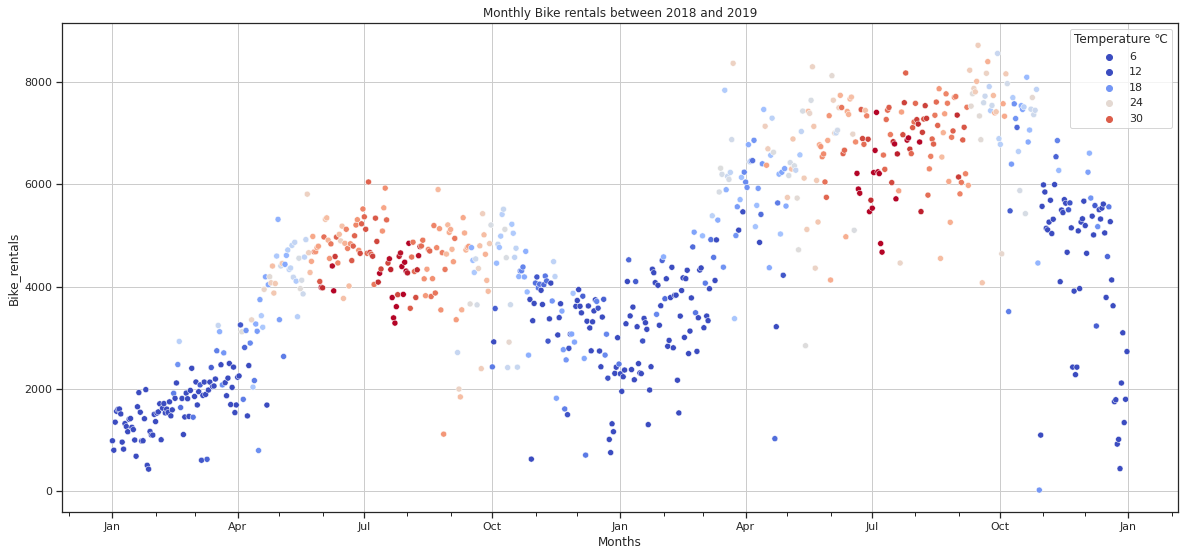

In [157]:
# scatter plot between date, temp and cnt
plt.figure(figsize=(20,9))
p = sns.color_palette('coolwarm', as_cmap=True, n_colors=5)
ax = sns.scatterplot(x=df.dteday, y=df.cnt, hue=df.temp, hue_norm=(15,32),palette=p)
ax.xaxis.set_major_formatter(DateFormatter('%b'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.legend(title='Temperature \u2103') #u2103 --> degree-celsius
ax.set_title("Monthly Bike rentals between 2018 and 2019")
ax.set_xlabel('Months')
ax.set_ylabel('Bike_rentals')

### Affect of weathersit on bike rentals
It is apparent from the following graph that most of the dips in bike_rental numbers were caused by category 3 of 'weathersit' which stands for thunderstorm and light rain. 

[]

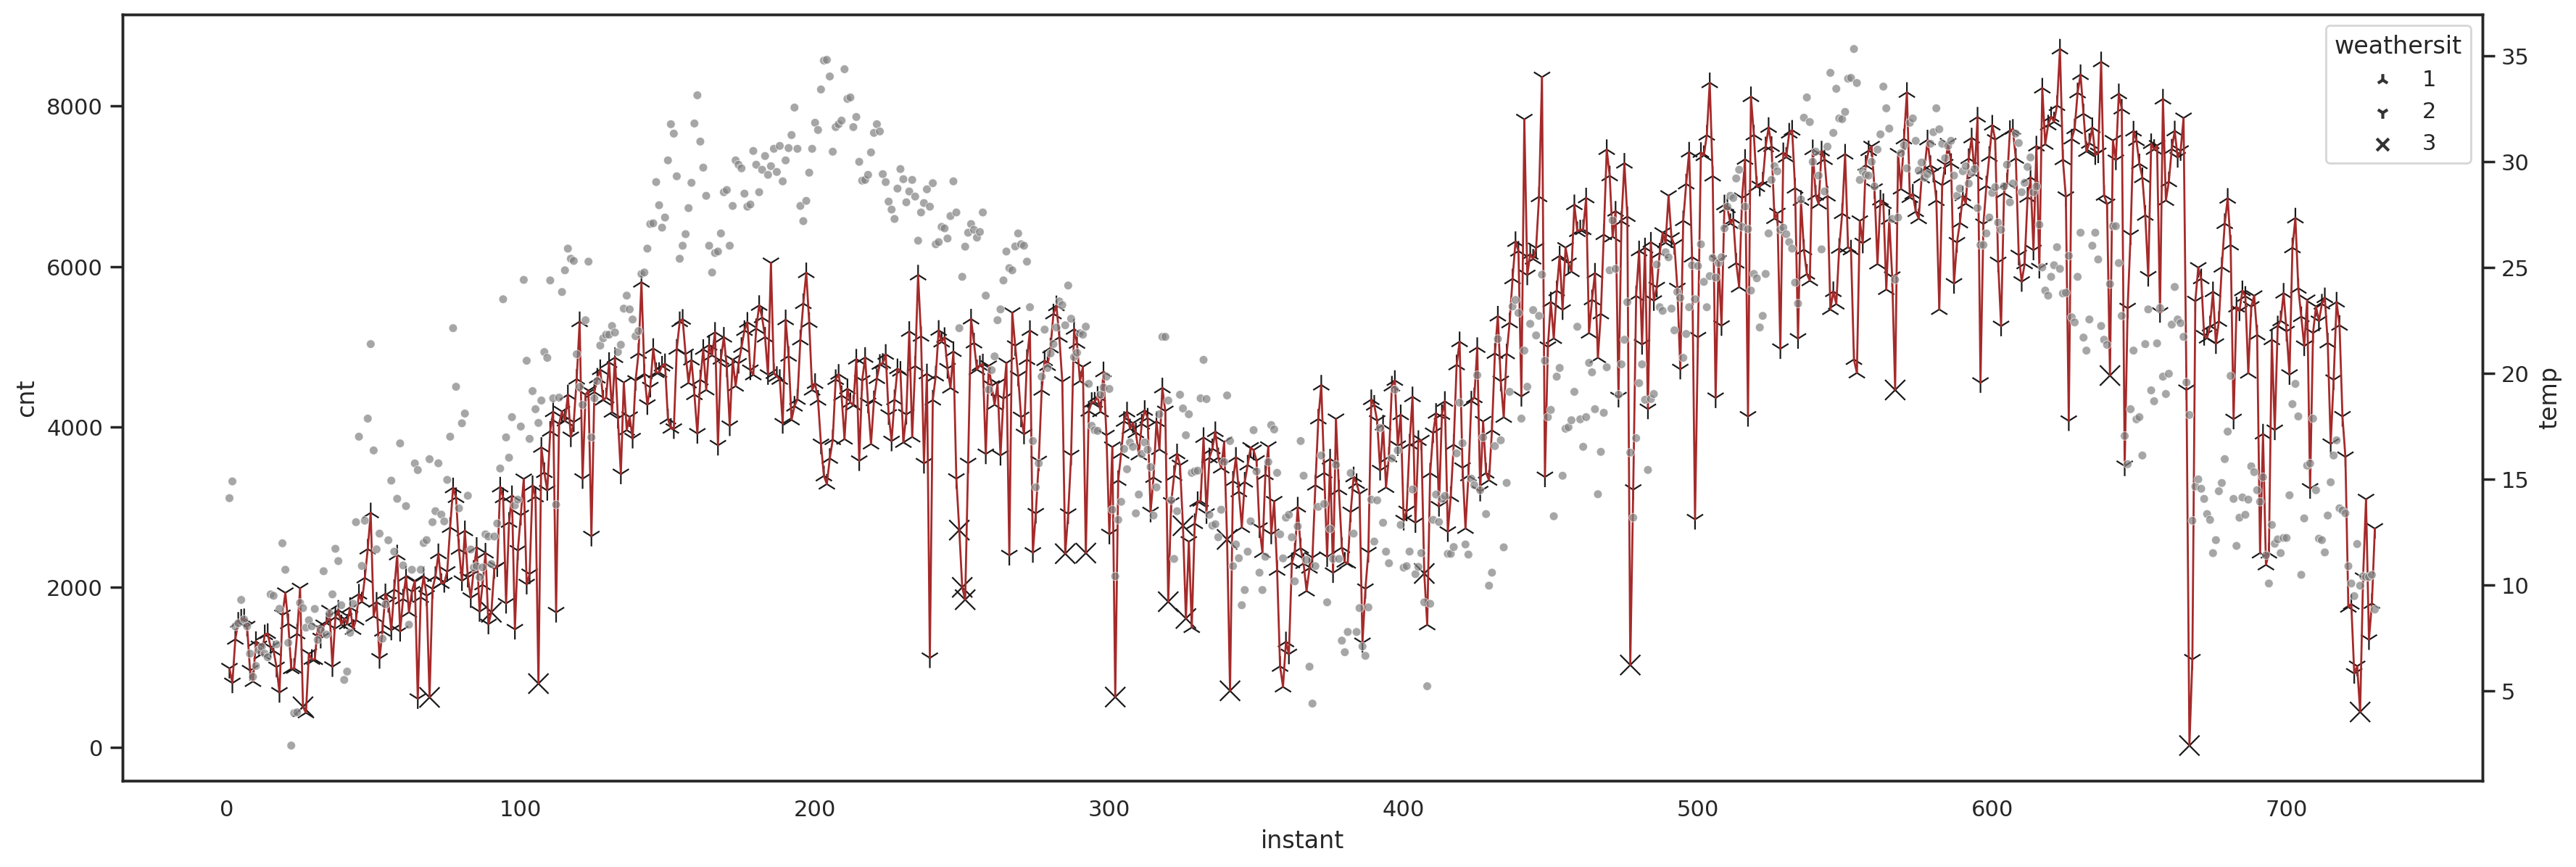

In [190]:
from sklearn.preprocessing import MinMaxScaler
to_plot = df.cnt
plt.figure(figsize=(21,7), dpi=200)
sns.set_style('white')
# bike rentals
ax = sns.lineplot(x=df.index,y=to_plot, linewidth=1, color='brown')
# temperature
ax2 = ax.twinx()
sns.scatterplot(x = df.index, y = df.temp, color='grey', ax=ax2, alpha=.7, size=1, legend=False)
# weathersit
sns.scatterplot(x = df.index, y = to_plot, 
                style = df.weathersit, markers=['2','1','x'], s=100, 
                color='k', alpha=1, ax=ax)

plt.plot()

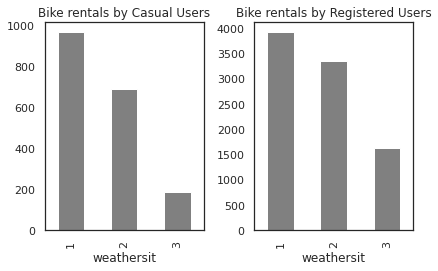

<IPython.core.display.Latex object>

In [159]:
plt.figure(figsize=(6,7))
def cat_plots(feature):
    plt.subplot(221)
    ax1 = df.groupby(feature).mean()['casual'].plot.bar(color='grey')
    ax1.set_title('Bike rentals by Casual Users')
    plt.subplot(222)
    ax2 = df.groupby(feature).mean()['registered'].plot.bar(color='grey')
    ax2.set_title('Bike rentals by Registered Users')
    plt.tight_layout()
    plt.show()
    display(Latex(f'No of bike rentals VS {feature}'))
cat_plots('weathersit')

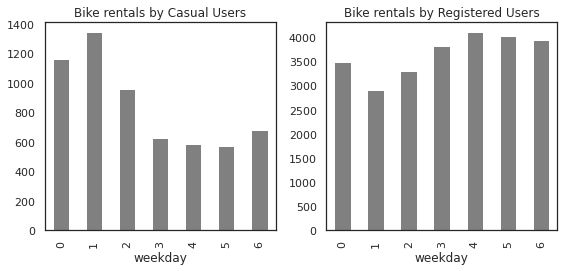

<IPython.core.display.Latex object>

In [160]:
plt.figure(figsize=(8,7))
cat_plots('weekday')

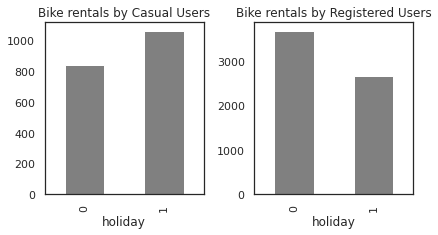

<IPython.core.display.Latex object>

In [161]:
plt.figure(figsize=(6,6))
cat_plots('holiday')

In [162]:
df.holiday.sum()

21

In [163]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.181250,80.5833,10.749882,331,654,985
2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.686950,69.6087,16.652113,131,670,801
3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
6,2018-01-06,1,0,1,0,6,0,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
7,2018-01-07,1,0,1,0,0,0,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
8,2018-01-08,1,0,1,0,1,1,2,6.765000,8.112700,53.5833,17.875868,68,891,959
9,2018-01-09,1,0,1,0,2,1,1,5.671653,5.808750,43.4167,24.250650,54,768,822


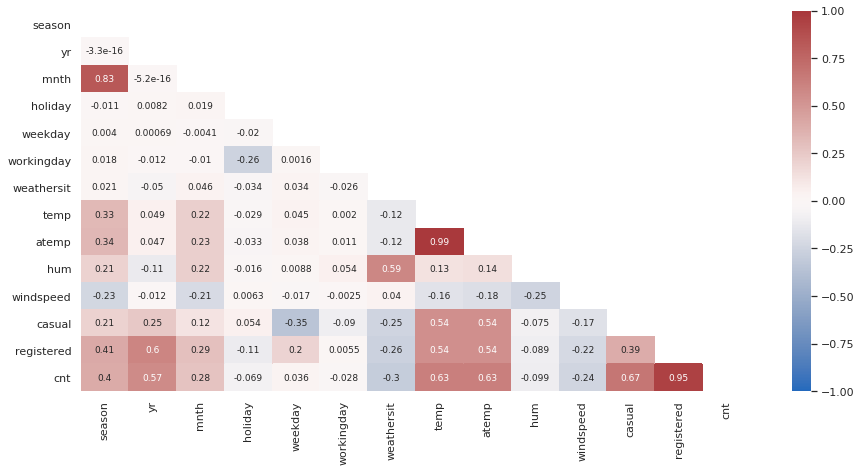

In [164]:
corr = df.corr()
mask  = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,7))
with sns.axes_style('dark'):
    ax = sns.heatmap(corr,mask=mask, vmax=1, vmin=-1,cmap='vlag', annot=True, annot_kws={'fontsize':9})

# Featuring Selection

Initially dropping some features based on correlation plot and common sense.
1. Dropping temp and keeping atemp. As `temp` is temperature while `atemp` is 'feeling temperature' in Celsius
2. Dropping `dteday` as it is a string and its information is already in `month` and `yr`.
3. Dropping `casual` and `registerd` as `cnt` is their sum. 

#### Helper Functions
Following section contains some helper function which reduce duplicate code. 

In [165]:
def drop_columns(to_drop, *df):
    x = [i.drop(to_drop, axis='columns') for i in df]
    if len(x) == 1: return x[0]
    else: return x

def add_constant(*df):
## using 'add' flag to ensure SM does not treat columns with 
## same value like 'yr' as constant for certain slices of test-train set.
    x = [sm.add_constant(i, has_constant='add') for i in df]
    if len(x) == 1: return x[0]
    else: return x

def VIF(df_withC):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['Features'] = df_withC.columns
    vif['VIF'] = [variance_inflation_factor(df_withC.values, i) for i in range(len(df_withC.columns))]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif

def summary_with_vif(lr_SM_model):
    """
    Note: This function assumes that the following variables are already defined:
    'X_train_sm', 'X_test_sm', 'y_test'
    """
    vif_df = VIF(X_train_sm)
    line = '-'*10
    additions = [(9, line),
                 (10, '     VIF'),
                 (11,  line)]
    summary = str(lr_SM_model.summary2()).splitlines()
    # feature names start from 13th line, 
    for i, string in enumerate(summary[12:]):
        if '-'*60 in string: #if the line has a long series of '-', thats end of feature list
            additions.append((12+i, line))
            break
        feature = string.split()[0]
        vif = vif_df[vif_df['Features']==feature].VIF.round(2)
        additions.append((12+i, '   '+str(vif.item())))
    
    for index, value in additions:
        summary[index] += value
        
    print('\n'.join(summary))
    y_test_pred = lr_SM_model.predict(X_test_sm)
    r2_test = r2_score(y_test, y_test_pred).round(3)
    display(Latex(f'$R^{{2}}_{{train}}={lr_SM_model.rsquared.round(3)},\ R^{{2}}_{{test}}={r2_test}$'))


### Test Train split

In [166]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=3) #1024
target = 'cnt'
y_train, y_test = train[target], test[target]

### lr0

In [167]:
to_drop = [target, 'dteday','casual','registered','temp'] # Selecting columns
X_train, X_test = drop_columns(to_drop, train, test)      # Preparing Data
X_train_sm, X_test_sm = add_constant(X_train, X_test)     # Adding Constant
# Modelling and Evaluating
lr0 = sm.OLS(y_train, X_train_sm).fit()
summary_with_vif(lr0)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.802     
Dependent Variable: cnt              AIC:                8968.5859 
Date:               2021-04-09 17:09 BIC:                9015.9348 
No. Observations:   547              Log-Likelihood:     -4473.3   
Df Model:           10               F-statistic:        222.6     
Df Residuals:       536              Prob (F-statistic): 1.40e-183 
R-squared:          0.806            Scale:              7.5780e+05
-----------------------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|    [0.025     0.975]      VIF
-----------------------------------------------------------------------------
const        1885.8883 263.6661  7.1526 0.0000  1367.9428 2403.8339   50.18
season        479.1467  64.5642  7.4212 0.0000   352.3168  605.9767   3.91
yr           2054.2964  75.3277 27.2715 0.0000  1906.3227 2202.2702   1.02
mnth          -3

<IPython.core.display.Latex object>

In [168]:
def make_train_pred(lr):
    y_pred = lr.predict(X_train_sm)
    train_pred = pd.concat([y_train, y_pred], axis='columns', keys=('train', 'pred')).sort_index()
    train_pred['residual'] = train_pred.train - train_pred.pred
    return train_pred

In [169]:
train_pred = make_train_pred(lr0)
train_pred.head()

,train,pred,residual
instant,,,
1,985,1664.440341,-679.440341
2,801,1535.289590,-734.289590
3,1349,1488.966308,-139.966308
4,1562,1664.711550,-102.711550
5,1600,1909.636963,-309.636963


<Figure size 6000x4000 with 0 Axes>

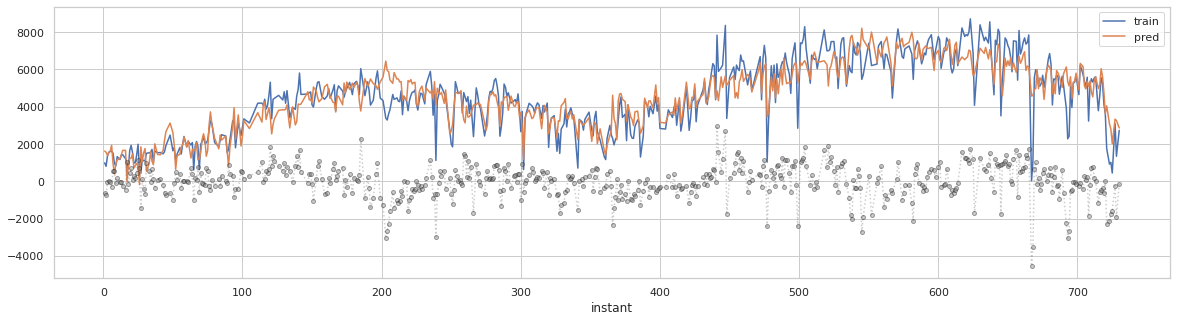

In [189]:
sns.set_style('whitegrid')
def train_pred_residual_plot(train_pred_df):
    train_pred_df.plot(y=['train','pred'],figsize=[20,5])
    res = train_pred.train - train_pred.pred
    plt.plot(train_pred.index,res , color="grey", linewidth=1.5, linestyle=":",
             markersize=8, marker='.', markerfacecolor='grey', markeredgecolor='k', alpha=0.4);
train_pred_residual_plot(train_pred)

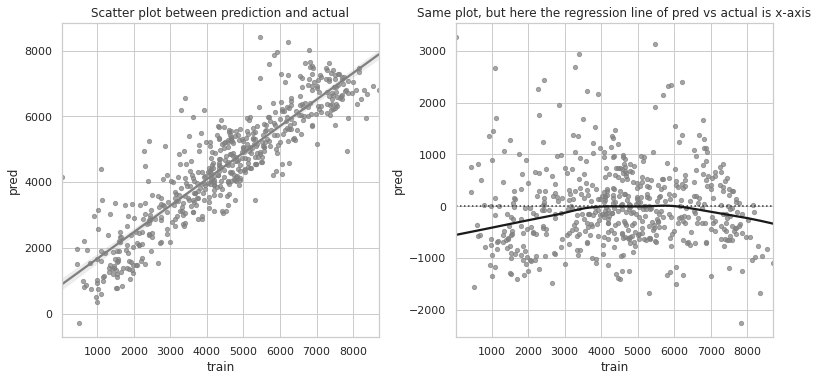

In [171]:
def residual_analysis():
    """
    This requires following varibles:
    Dataframe--> 'train_pred'
    """
    plt.figure(figsize=(11,10))
    plt.subplot(221, title='Scatter plot between prediction and actual')
    sns.regplot(x=train_pred.train, y=train_pred.pred, color='grey', scatter_kws={'s':18, 'alpha':.7})
    plt.subplot(222, title='Same plot, but here the regression line of pred vs actual is x-axis')
    sns.residplot(x=train_pred.train, y=train_pred.pred, lowess=True, color='grey',
                  line_kws={'color':'k'}, scatter_kws={'s':18, 'alpha':0.7})
    plt.tight_layout()
residual_analysis()

### lr1

Dropping `weekday` as it has $p=0.5$

In [172]:
to_drop = ['dteday','cnt','casual','registered','temp', # Selecting columns
           'weekday']
X_train, X_test = drop_columns(to_drop, train, test)    # Preparing Data
X_train_sm, X_test_sm = add_constant(X_train, X_test)   # Adding Constant
# Modelling and Evaluating
lr1 = sm.OLS(y_train, X_train_sm).fit()
summary_with_vif(lr1)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.803     
Dependent Variable: cnt              AIC:                8966.9984 
Date:               2021-04-09 17:09 BIC:                9010.0429 
No. Observations:   547              Log-Likelihood:     -4473.5   
Df Model:           9                F-statistic:        247.6     
Df Residuals:       537              Prob (F-statistic): 1.06e-184 
R-squared:          0.806            Scale:              7.5696e+05
-----------------------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|    [0.025     0.975]      VIF
-----------------------------------------------------------------------------
const        1916.8540 258.9870  7.4014 0.0000  1408.1023 2425.6058   48.47
season        480.0961  64.5112  7.4421 0.0000   353.3710  606.8213   3.9
yr           2055.0881  75.2756 27.3008 0.0000  1907.2173 2202.9590   1.02
mnth          -31

<IPython.core.display.Latex object>

<Figure size 1200x800 with 0 Axes>

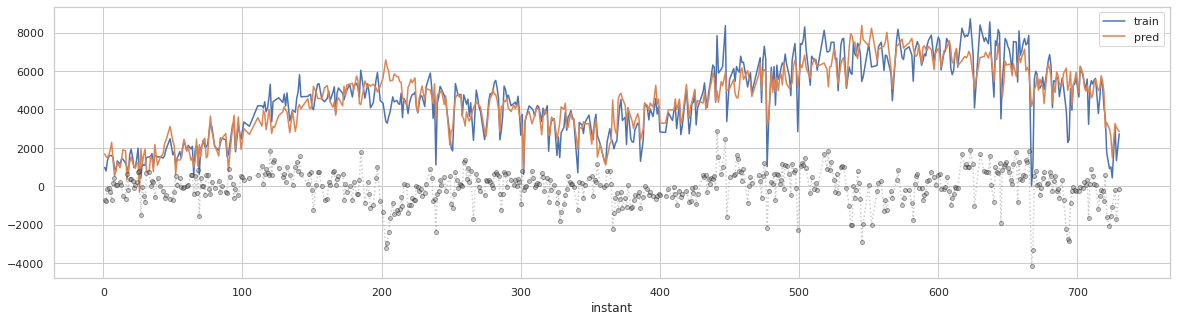

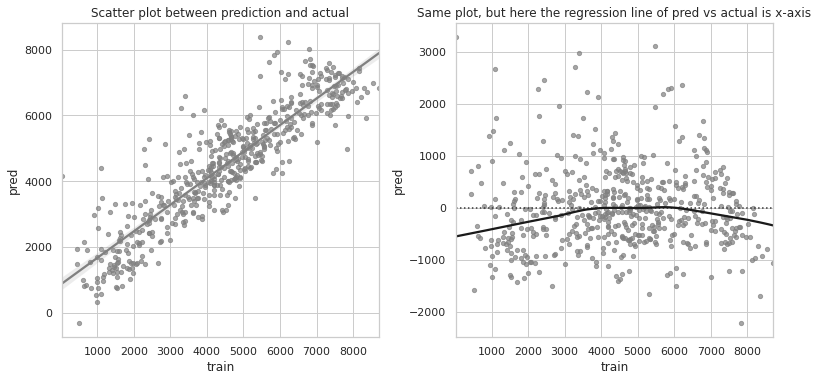

In [173]:
train_pred = make_train_pred(lr1)
train_pred_residual_plot(train_pred)
residual_analysis()

### lr2
Dropping `mnth` for high VIF value instead of `season` as it has $p=0.12$

In [174]:
to_drop = ['dteday','cnt','casual','registered','temp', # Selecting columns
           'weekday', 'mnth']
X_train, X_test = drop_columns(to_drop, train, test)    # Preparing Data
X_train_sm, X_test_sm = add_constant(X_train, X_test)   # Adding Constant
# Modelling and Evaluating
lr2 = sm.OLS(y_train, X_train_sm).fit()
summary_with_vif(lr2)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.802     
Dependent Variable: cnt              AIC:                8967.4233 
Date:               2021-04-09 17:09 BIC:                9006.1633 
No. Observations:   547              Log-Likelihood:     -4474.7   
Df Model:           8                F-statistic:        277.5     
Df Residuals:       538              Prob (F-statistic): 2.02e-185 
R-squared:          0.805            Scale:              7.5891e+05
-----------------------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|    [0.025     0.975]      VIF
-----------------------------------------------------------------------------
const        1931.7915 259.1394  7.4546 0.0000  1422.7423 2440.8406   48.4
season        396.8109  35.4615 11.1899 0.0000   327.1510  466.4708   1.18
yr           2051.8979  75.3442 27.2337 0.0000  1903.8931 2199.9027   1.02
holiday      -724

<IPython.core.display.Latex object>

<Figure size 1200x800 with 0 Axes>

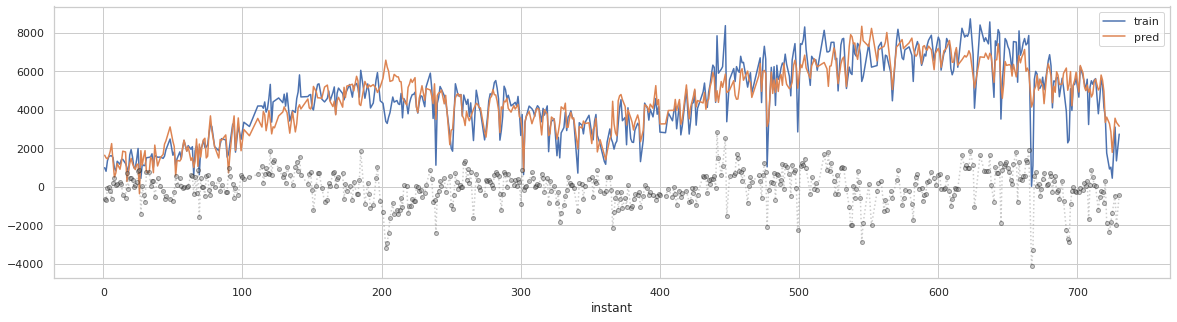

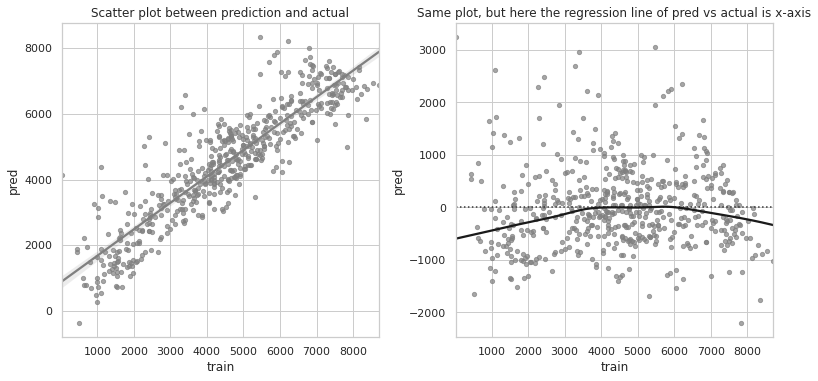

In [175]:
train_pred = make_train_pred(lr2)
train_pred_residual_plot(train_pred)
residual_analysis()

### lr3 
**Experiment**: dropping `weathersit` and introducing a new variable `rain_yesterday` which has a value 1 for the day it rained and the day following it. To test the hypothesis if people bike if previous day was bad weather.

In [176]:
tt = df['weathersit']==3
tt[24:30]

instant
25    False
26     True
27    False
28    False
29    False
30    False
Name: weathersit, dtype: bool

In [177]:
tt2 = tt.copy(deep=True)
tt2.index = list(range(2,len(tt)+2))
tt.index , tt2.index

(Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             721, 722, 723, 724, 725, 726, 727, 728, 729, 730],
            dtype='int64', name='instant', length=730),
 Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
             ...
             722, 723, 724, 725, 726, 727, 728, 729, 730, 731],
            dtype='int64', length=730))

In [178]:
tt = tt|tt2
tt[24:30]

25    False
26     True
27     True
28    False
29    False
30    False
Name: weathersit, dtype: bool

dropping 'weathersit' and replacing it with 'rain_yesterday'

In [179]:
def rain_yesterday(df):
    tt = df['weathersit']==3
    tt2 = tt.copy(deep=True)
    tt2.index = list(range(2,len(tt)+2))
    tt = tt|tt2
    df['rain_yesterday'] = tt * 1

In [180]:
rain_yesterday(train)
rain_yesterday(test)
to_drop = ['dteday','cnt','casual','registered','temp', # Selecting columns
           'mnth', 'weekday','weathersit']
X_train, X_test = drop_columns(to_drop, train, test)    # Preparing Data
X_train_sm, X_test_sm = add_constant(X_train, X_test)   # Adding Constant
# Modelling and Evaluating
lr3 = sm.OLS(y_train, X_train_sm).fit()
summary_with_vif(lr3)

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.793     
Dependent Variable:   cnt              AIC:                8991.3134 
Date:                 2021-04-09 17:09 BIC:                9030.0535 
No. Observations:     547              Log-Likelihood:     -4486.7   
Df Model:             8                F-statistic:        262.8     
Df Residuals:         538              Prob (F-statistic): 2.47e-180 
R-squared:            0.796            Scale:              7.9279e+05
-------------------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|    [0.025     0.975]      VIF
-------------------------------------------------------------------------------
const          1858.0329 265.7445  6.9918 0.0000  1336.0089 2380.0568   48.73
season          413.7467  36.3110 11.3945 0.0000   342.4179  485.0754   1.18
yr             1979.7991  77.0402 25.6983 0.0000  1828.4626 2131.1

<IPython.core.display.Latex object>

Introducing `rain_yesterday` changed the $R^2 $ and $adj. R^2$ nominally hence it was a failure.

## Dropping unnecessary variables after checking if they influence the model statistics

In [181]:
train, test = train_test_split(df, test_size=0.25, random_state=3) #1024
target = 'cnt'
y_train, y_test = train[target], test[target]

### lr4 
Checking `hum`

In [182]:
to_drop = ['dteday','cnt','casual','registered','temp', # Selecting columns
           'weekday', 'mnth',
           'hum']
X_train, X_test = drop_columns(to_drop, train, test)    # Preparing Data
X_train_sm, X_test_sm = add_constant(X_train, X_test)   # Adding Constant
# Modelling and Evaluating
lr4 = sm.OLS(y_train, X_train_sm).fit()
summary_with_vif(lr4)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.797     
Dependent Variable: cnt              AIC:                8979.3714 
Date:               2021-04-09 17:09 BIC:                9013.8070 
No. Observations:   547              Log-Likelihood:     -4481.7   
Df Model:           7                F-statistic:        307.8     
Df Residuals:       539              Prob (F-statistic): 1.04e-183 
R-squared:          0.800            Scale:              7.7706e+05
-----------------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025     0.975]      VIF
-----------------------------------------------------------------------------
const       1410.4950 220.7591   6.3893 0.0000   976.8412 1844.1487   34.31
season       380.4824  35.6083  10.6852 0.0000   310.5342  450.4305   1.16
yr          2088.8934  75.5758  27.6397 0.0000  1940.4343 2237.3525   1.01
holiday     -766

<IPython.core.display.Latex object>

In [183]:
print('R-squared of model 2 -- ', lr2.rsquared)

R-squared of model 2 --  0.8049229298416295


Model statistics didn't change hence dropping `hum`

### lr5
Checking `windspeed`

In [184]:
to_drop = ['dteday','cnt','casual','registered','temp', # Selecting columns
           'weekday', 'mnth',
           'hum', 
           'windspeed']
X_train, X_test = drop_columns(to_drop, train, test)    # Preparing Data
X_train_sm, X_test_sm = add_constant(X_train, X_test)   # Adding Constant
# Modelling and Evaluating
lr5 = sm.OLS(y_train, X_train_sm).fit()
summary_with_vif(lr5)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.792     
Dependent Variable: cnt              AIC:                8992.4830 
Date:               2021-04-09 17:09 BIC:                9022.6142 
No. Observations:   547              Log-Likelihood:     -4489.2   
Df Model:           6                F-statistic:        347.5     
Df Residuals:       540              Prob (F-statistic): 8.96e-182 
R-squared:          0.794            Scale:              7.9735e+05
-----------------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025     0.975]      VIF
-----------------------------------------------------------------------------
const        931.7498 185.5538   5.0215 0.0000   567.2540 1296.2456   23.62
season       405.7942  35.4615  11.4432 0.0000   336.1349  475.4535   1.12
yr          2096.7080  76.5288  27.3976 0.0000  1946.3773 2247.0387   1.0
holiday     -780.

<IPython.core.display.Latex object>

Model statistics didn't change hence dropping `windspeed`

## Residual Analysis and validation with test set


<Figure size 1200x800 with 0 Axes>

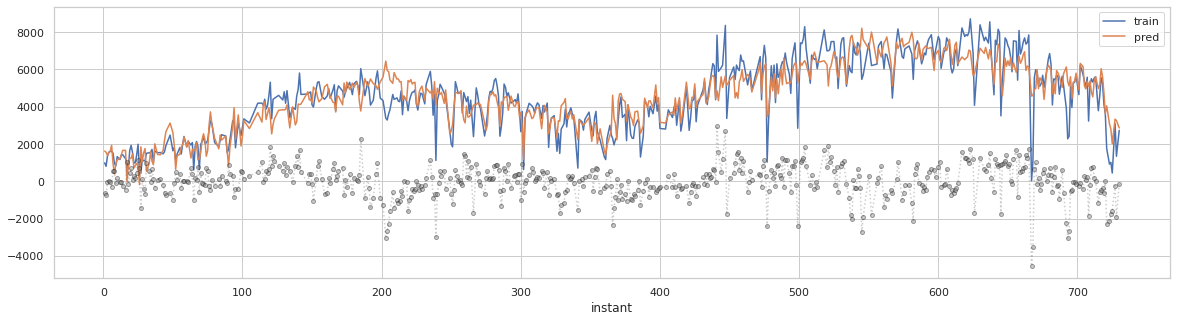

In [185]:
train_pred = make_train_pred(lr5)
train_pred_residual_plot(train_pred)


Predictions follow training fairly well. Though dips are not predicted well.  
Residuals stay uniformly noisy throughout

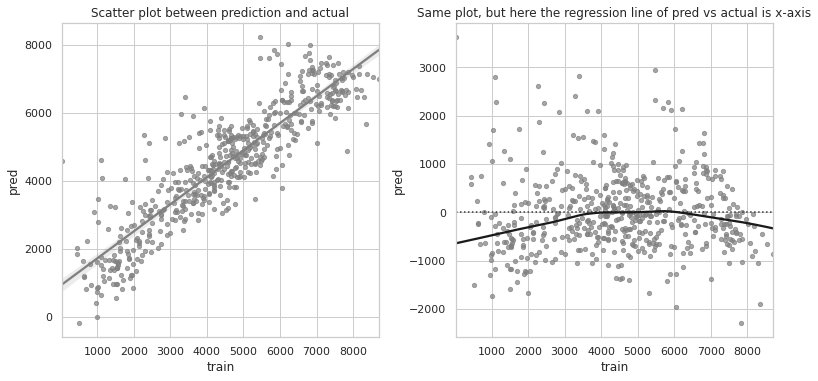

In [186]:
residual_analysis()

There is some pattern in the residuals, a lot of outliers are present, which represent large errors in prediction.  
Prediction especially fall short for low and high values of `cnt`. Which signifies that the model works well for average values but not for extreme cases. 

## Keeping lr5 as the final model, normalizing data to assess each features' contribution

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [188]:
train, test = train_test_split(df, test_size=0.25, random_state=3) #1024
col = train.describe().columns
train[col] = scaler.fit_transform(train[col])
test[col] = scaler.transform(test[col])

target = 'cnt'
y_train, y_test = train[target], test[target]

to_drop = ['dteday','cnt','casual','registered','temp', # Selecting columns
           'weekday', 'mnth',
           'hum', 
           'windspeed']

X_train, X_test = drop_columns(to_drop, train, test)    # Preparing Data
X_train_sm, X_test_sm = add_constant(X_train, X_test)   # Adding Constant
# Modelling and Evaluating
lr6 = sm.OLS(y_train, X_train_sm).fit()
summary_with_vif(lr6)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.792    
Dependent Variable: cnt              AIC:                -930.2702
Date:               2021-04-09 17:09 BIC:                -900.1391
No. Observations:   547              Log-Likelihood:     472.14   
Df Model:           6                F-statistic:        347.5    
Df Residuals:       540              Prob (F-statistic): 8.96e-182
R-squared:          0.794            Scale:              0.010554 
-----------------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]     VIF
-----------------------------------------------------------------------------
const          0.1115    0.0151    7.4004  0.0000   0.0819   0.1411   11.77
season         0.1401    0.0122   11.4432  0.0000   0.1160   0.1641   1.12
yr             0.2412    0.0088   27.3976  0.0000   0.2239   0.2585   1.0
holiday       -0.0897    

<IPython.core.display.Latex object>

Top three contributors are
1. `atemp` : 0.53
2. `yr` : 0.24
3. `weathersit` : -0.19